In [3]:
#This DataSet Explores the Olympic Games over the past few years
#first we will import all the libraries 

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

In [14]:
#Now we import the dataset
athletes = pd.read_csv('athlete_events.csv')
region = pd.read_csv('noc_regions.csv')


In [11]:
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [15]:
region.head(10)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN
5,ANG,Angola,NaN
6,ANT,Antigua,Antigua and Barbuda
7,ANZ,Australia,Australasia
8,ARG,Argentina,NaN
9,ARM,Armenia,NaN


In [19]:
#Join the dataframe
athletes_df = athletes.merge(region, how = 'left', on = 'NOC')
athletes_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [20]:
athletes_df.shape

(271116, 17)

In [25]:
#Let's make Column name
athletes_df.rename(columns ={'region': 'Region', 'notes': 'Notes'}, inplace=True);

In [27]:
athletes_df.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN


In [29]:
athletes_df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [30]:
athletes_df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
Region       370
Notes     266077
dtype: int64

In [37]:
#Let's print the columns names containing null values or missing values in a form of a list
#for col in athletes_df:
 #   if athletes_df.isnull() == 1:
  #      print(col)
athletes_df.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN


In [41]:
# Nigerian Participants
athletes_df.query('Team == "Nigeria"').head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
211,101,Adeyemi Abayomi,M,25.0,170.0,51.0,Nigeria,NGR,1972 Summer,1972,Summer,Munich,Boxing,Boxing Men's Lightweight,NaN,Nigeria,NaN
544,313,"Lawal Kolawole ""Kola"" Abdulai",M,21.0,172.0,66.0,Nigeria,NGR,1968 Summer,1968,Summer,Mexico City,Athletics,Athletics Men's 100 metres,NaN,Nigeria,NaN
545,313,"Lawal Kolawole ""Kola"" Abdulai",M,21.0,172.0,66.0,Nigeria,NGR,1968 Summer,1968,Summer,Mexico City,Athletics,Athletics Men's 4 x 100 metres Relay,NaN,Nigeria,NaN
546,313,"Lawal Kolawole ""Kola"" Abdulai",M,25.0,172.0,66.0,Nigeria,NGR,1972 Summer,1972,Summer,Munich,Athletics,Athletics Men's 100 metres,NaN,Nigeria,NaN
547,313,"Lawal Kolawole ""Kola"" Abdulai",M,25.0,172.0,66.0,Nigeria,NGR,1972 Summer,1972,Summer,Munich,Athletics,Athletics Men's 4 x 100 metres Relay,NaN,Nigeria,NaN


In [42]:
# Ghana Participants
athletes_df.query('Team == "Ghana"').head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
800,458,Felix Ahmed Aboagye,M,20.0,176.0,70.0,Ghana,GHA,1996 Summer,1996,Summer,Atlanta,Football,Football Men's Football,NaN,Ghana,NaN
1189,667,"Benjamin ""Ben"" Acheampong",M,25.0,161.0,62.0,Ghana,GHA,1964 Summer,1964,Summer,Tokyo,Football,Football Men's Football,NaN,Ghana,NaN
1190,668,Gemma Acheampong,F,23.0,163.0,54.0,Ghana,GHA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,Ghana,NaN
1191,669,Joachim Yaw Acheampong,M,18.0,181.0,73.0,Ghana,GHA,1992 Summer,1992,Summer,Barcelona,Football,Football Men's Football,Bronze,Ghana,NaN
1294,728,George Wilson Acquaah,M,26.0,NaN,NaN,Ghana,GHA,1952 Summer,1952,Summer,Helsinki,Athletics,Athletics Men's 100 metres,NaN,Ghana,NaN


In [49]:
#Top 10 number of Participant
top_10 = athletes_df.Team.value_counts().sort_values(ascending=False).head(10)
top_10

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

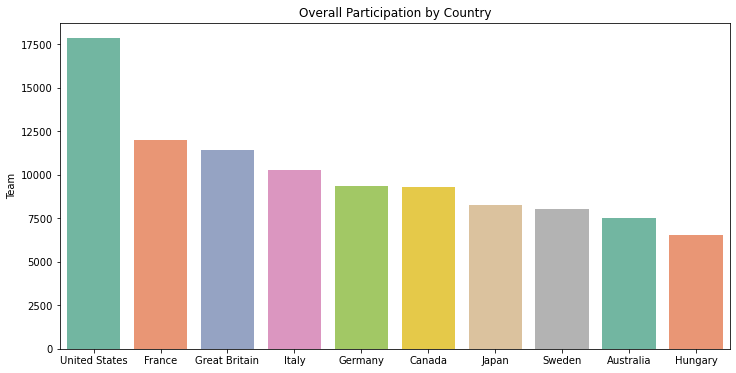

In [50]:
# Plot the Top 10 Countries
plt.figure(figsize=(12,6))
plt.title('Overall Participation by Country')
sns.barplot(x=top_10.index, y=top_10, palette = 'Set2');

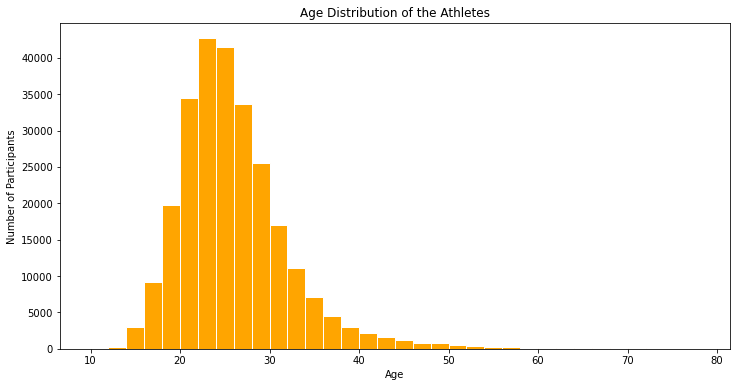

In [57]:
# Age Distribution of the Participants
plt.figure(figsize=(12,6))
plt.title("Age Distribution of the Athletes")
plt.xlabel('Age')
plt.ylabel('Number of Participants')
plt.hist(athletes_df.Age, bins = np.arange(10,80,2), color = 'orange', edgecolor = 'white');

In [58]:
# Winter Sports games
winter_sport = athletes_df[athletes_df.Season =='Winter'].Sport.unique()
winter_sport

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [59]:
summer_sport = athletes_df[athletes_df.Season =='Summer'].Sport.unique()
summer_sport

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [69]:
# Male and Female Participant
gender_dist = athletes_df.Sex.value_counts()
gender_dist

M    196594
F     74522
Name: Sex, dtype: int64

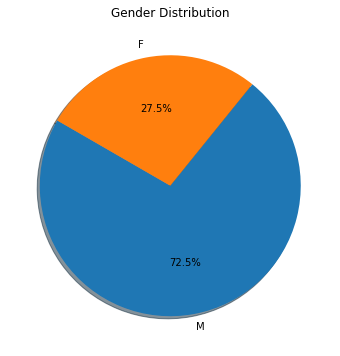

In [74]:
plt.figure(figsize=(12,6))
plt.title('Gender Distribution')
plt.pie(gender_dist, labels=gender_dist.index, autopct='%1.1f%%', startangle=150, shadow=True);

In [76]:
medal_count = athletes_df.Medal.value_counts()
medal_count

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

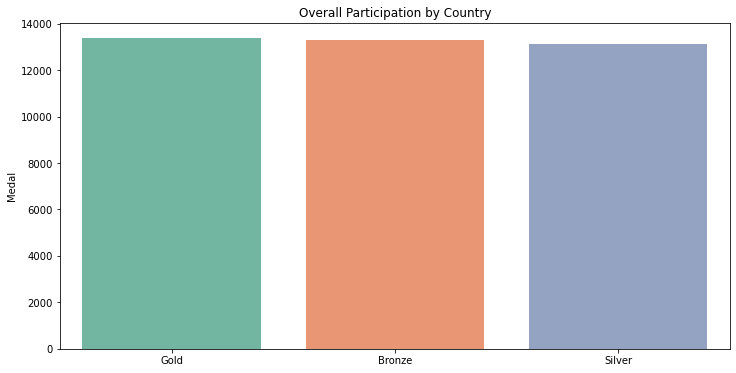

In [77]:
plt.figure(figsize=(12,6))
plt.title('Overall Participation by Country')
sns.barplot(x=medal_count.index, y=medal_count, palette = 'Set2');

In [92]:
#Total Number of Female athletes in each Olympics
female_participants = athletes_df[(athletes_df.Sex=='F') & (athletes_df.Season=='Summer')][['Sex','Year']]
female_participants = female_participants.groupby('Year').count().reset_index()
female_participants.tail()

,Year,Sex
23,2000,5431
24,2004,5546
25,2008,5816
26,2012,5815
27,2016,6223


In [93]:
# Let's Plot Female Participants using another format
women_pats = athletes_df[(athletes_df.Sex == 'F') & (athletes_df.Season =='Summer')]

Text(0.5, 1.0, 'Women Participation')

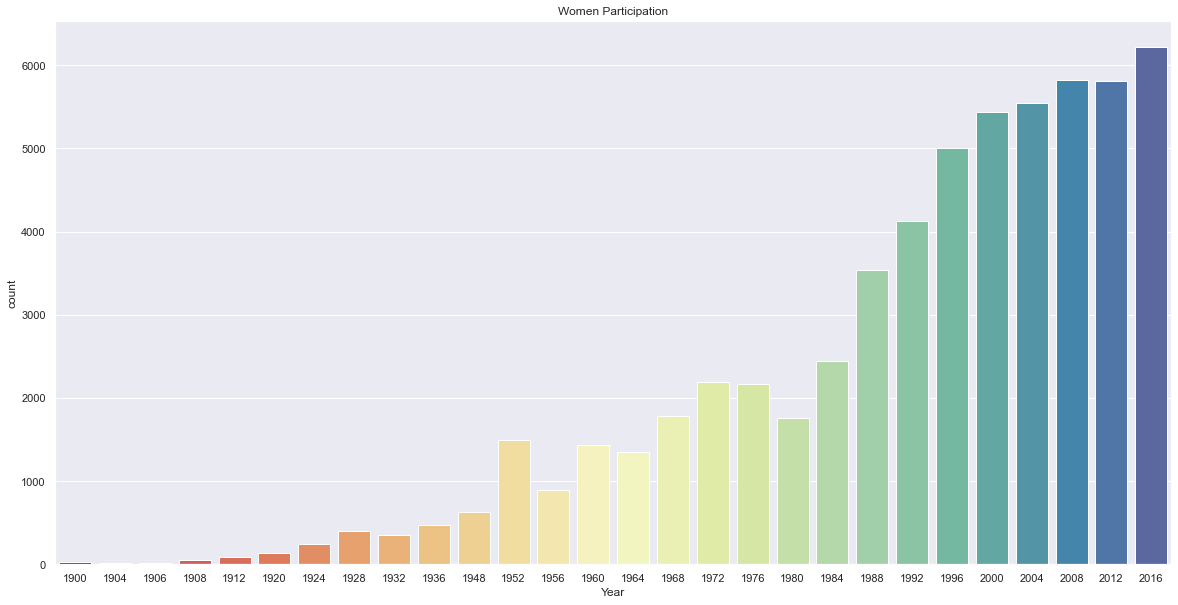

In [94]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
sns.countplot(x='Year', data=women_pats, palette="Spectral")
plt.title('Women Participation')

In [100]:
# Let's Plot Male Participants using another format
men_pats = athletes_df[(athletes_df.Sex == 'M') & (athletes_df.Season =='Summer')]
men_pats.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
271105,135565,Fernando scar Zylberberg,M,23.0,168.0,76.0,Argentina,ARG,2000 Summer,2000,Summer,Sydney,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN
271106,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN
271107,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN
271108,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN
271109,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN


Text(0.5, 1.0, 'Male Participation')

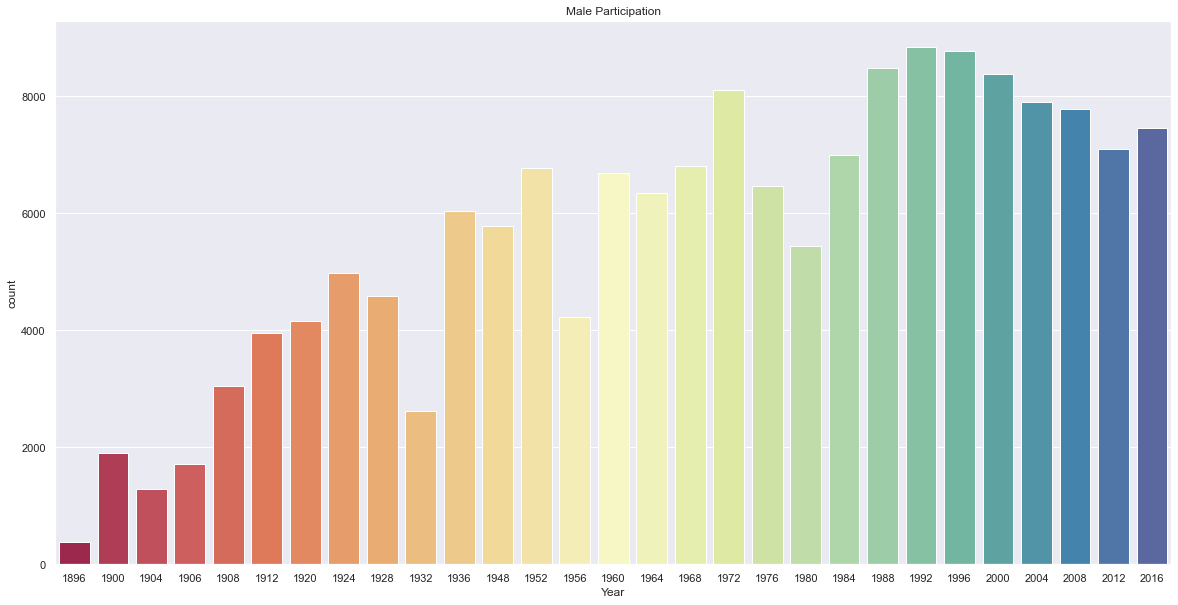

In [98]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
sns.countplot(x='Year', data=men_pats, palette="Spectral")
plt.title('Male Participation')

In [101]:
# Gold Medal Athletes
athletes_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [103]:
goldmedals = athletes_df[(athletes_df.Medal =='Gold')]
goldmedals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


In [105]:
# Gold Medal athletes beyond age 60
goldmedals = goldmedals[np.isfinite(goldmedals['Age'])]
goldmedals['ID'][goldmedals['Age']> 60].count()

6

In [106]:
# Gold medals from each country
goldmedals.Region.value_counts().reset_index(name='Medal').head()

,index,Medal
0,USA,2627
1,Russia,1599
2,Germany,1293
3,UK,657
4,Italy,567


In [113]:
# Athletes who won medals

nomedals = athletes_df[(athletes_df['Height'].notnull()) & (athletes_df['Weight'].notnull())]

Text(0.5, 1.0, 'Height vs Weight of Olympics Medalist')

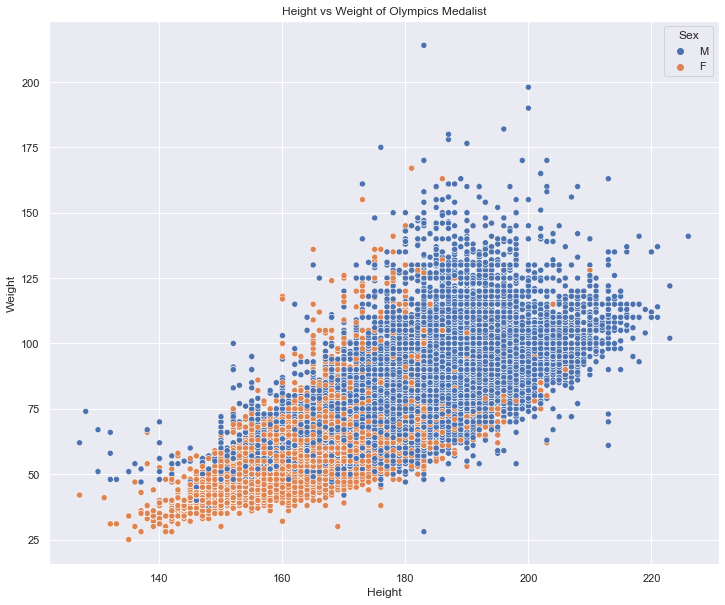

In [114]:
plt.figure(figsize =(12, 10))
axis = sns.scatterplot(x='Height', y="Weight", data=nomedals, hue="Sex")
plt.title('Height vs Weight of Olympics Medalist')